# Working with Dates and Times in R
## -- DataCamp - R programmer Career Track - Course 5 --

 To use this code, select the R environment in Anaconda
 
 **Used packages**
 - lubridate
 - anytime
 - hms
 - fasttime
 - ggridges
 
**Table of content**

- [&nbsp;&nbsp;1. Dates and Times in R](#toc_004271_1)
- [&nbsp;&nbsp;2. Using lubridate](#toc_004271_2)
- [&nbsp;&nbsp;3. Arithmetic with Dates and Times](#toc_004271_3)
- [&nbsp;&nbsp;4. Time zones](#toc_004271_4)

**Set environment and plot size**

In [196]:
options(repr.plot.width=6, repr.plot.height=6)
suppressMessages(library(tidyverse))
suppressMessages(library(readr))
suppressMessages(library(anytime))
suppressMessages(library(lubridate))
suppressMessages(library(hms))
suppressMessages(library(fasttime))
suppressMessages(library(ggridges))

Note: if the above code return an error message:
- Check that the correct R environment is selected in Anaconda
- Restart computer

**Import data**

In [37]:
suppressMessages(release <- read_csv('data/dates/rversions.csv'))
head(release, 1)

major,minor,patch,date,datetime,time,type
<dbl>,<dbl>,<dbl>,<date>,<dttm>,<time>,<chr>
0,60,NA,1997-12-04,1997-12-04 08:47:58,08:47:58,patch


In [123]:
suppressMessages(logs <- read_csv("data/dates/cran-logs_2015-04-17.csv"))
head(logs, 1)

datetime,r_version,country
<dttm>,<chr>,<chr>
2015-04-16 22:40:19,3.1.3,CO


In [43]:
suppressMessages(weather <- read_csv("data/dates/akl_weather_daily.csv"))
head(weather, 1)

date,max_temp,min_temp,mean_temp,mean_rh,events,cloud_cover
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2007-9-1,60,51,56,75,NA,4


In [ ]:
suppressMessages(weather16 <- read_csv("data/dates/akl_weather_hourly_2016.csv"))
head(weather16, 1)

year,month,mday,time,temperature,weather,conditions,events,humidity,date_utc
<dbl>,<dbl>,<dbl>,<time>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dttm>
2016,1,1,00:00:00,68,Clear,Clear,NA,68,2015-12-31 11:00:00


<a name="toc_004271_1"></a>
## 1.   Introduction to Dates and Times in R

In different countries, they use different date and time formats. E.g. in the US they use the format: 2/27/2013

The global ISO 8601 standard numeric formats are:
- **YYYY-MM-DD** for dates. The `-` separator is optional, but if we want to use a separator, it must be `-`.
- **HH:MM:SS** for time

<a name="toc_004271_1.1"></a>
**1.1 Get current date and time information**

In [108]:
Sys.Date()

[1] "2023-08-21"

In [109]:
str(Sys.Date()) # date object

 Date[1:1], format: "2023-08-21"


In [107]:
lubridate::today()
lubridate::now()

[1] "2023-08-21"

[1] "2023-08-21 14:38:38 CEST"

<a name="toc_004271_1.2"></a>
**1.2 Recognizing dates in R**

R will not recognise a date format if we do not specifically tell it that it is a date. We can do that with the following functions:
-  `as.Date()` function from the base package.
- `anytime()` function in the **anytime** package automatically parse strings as ISO style dates regardless of the format.

In [6]:
print(2013-02-27) # not a date object
str("2013-02-27")  # not a date object

[1] 1984
 chr "2013-02-27"


In [51]:
print(as.Date("2013-02-27"))
str(as.Date("2013-02-27")) # date object

[1] "2013-02-27"
 Date[1:1], format: "2013-02-27"


In [24]:
sep_10_2009 <- c("September 10 2009", "2009-09-10", "10 Sep 2009", "09-10-2009")
anytime(sep_10_2009)

[1] "2009-09-10 CEST" "2009-09-10 CEST" "2009-09-10 CEST" "2009-09-10 CEST"

In [22]:
head(anytime(releases$date))

[1] "1997-12-04 01:00:00 CET"  "1997-12-21 01:00:00 CET" 
[3] "1998-01-10 01:00:00 CET"  "1998-03-14 01:00:00 CET" 
[5] "1998-05-02 02:00:00 CEST" "1998-06-14 02:00:00 CEST"

In [23]:
head(anytime(releases$datetime))

[1] "1997-12-04 08:47:58 UTC" "1997-12-21 13:09:22 UTC"
[3] "1998-01-10 00:31:55 UTC" "1998-03-14 19:25:55 UTC"
[5] "1998-05-02 07:58:17 UTC" "1998-06-14 12:56:20 UTC"

<a name="toc_004271_1.3"></a>
**1.3 Using dates as numbers**

Once R knows it is a date, we can use it in calculations. This is because behind the scenes Date objects are stored as the number of days since **Jan 1st 1970**. That means you can ask if one date is greater than another, which will be true if it occurs after the other. You can add days to a date. And you can find the difference between dates.

In [28]:
as.Date("2013-02-27") > as.Date("2013-01-27")

[1] TRUE

In [8]:
as.Date("2013-02-27") - as.Date("2013-01-27")

Time difference of 31 days

In [74]:
print(max(release$date))
Sys.Date() - max(release$date)

[1] "2017-06-30"


Time difference of 2211 days

In [27]:
as.Date("2013-02-27") + 10

[1] "2013-03-09"

It also means plotting we can plot dates appropriately:

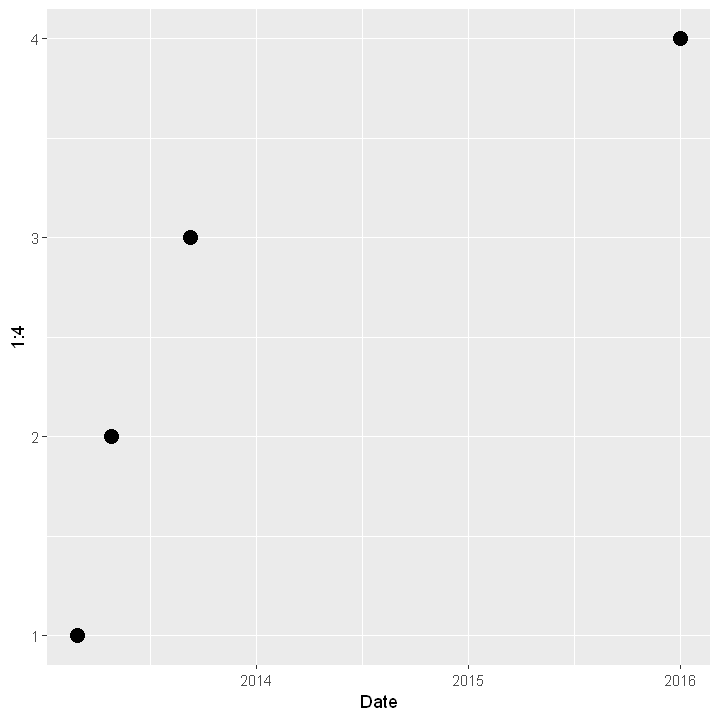

In [49]:
ggplot(, aes(
    x = c(as.Date("2013-02-27"),as.Date("2013-04-27"), as.Date("2013-09-10"), as.Date("2016-01-01")),
    y = 1:4)) +
  geom_point(size = 4) +
  labs(x = "Date")

In `ggplot()` we can control the presentation of dates with the `scale_x_date()` function:

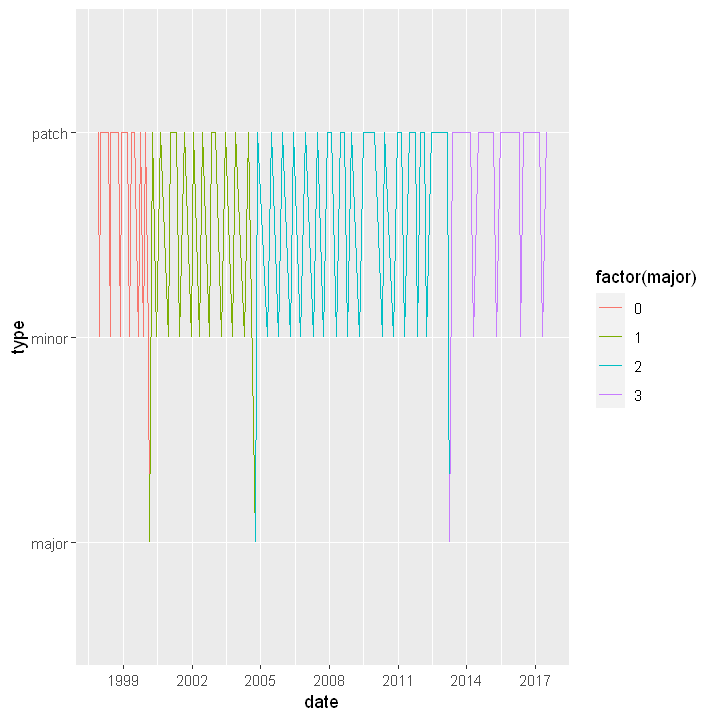

In [64]:
ggplot(release, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major)))  +
  scale_x_date(date_breaks = "3 years", date_labels = "%Y") # breaks every 3 years and labels with "%Y"

<a name="toc_004271_1.4"></a>
**1.4 Working with datetimes**

There are two built in types of objects for datetimes in R:
- **POSIXlt** - stores a date in a list with components for each unit
- **POSIXct** - stores the date as the number of seconds since the beginning of 1970 - more widely used.

We can turn strings into a POSIXct objects with:
- `as.POSIXct()` - it will read ISO 8601 datetimes. Use the `tz =` argument to specify the timezone (e.g. "UTC")

In [78]:
as.POSIXct("2010-10-01 12:12:00", tz = "America/Los_Angeles")
as.POSIXct("2010-10-01 12:12:00", tz = "CET")

[1] "2010-10-01 12:12:00 PDT"

[1] "2010-10-01 12:12:00 CEST"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


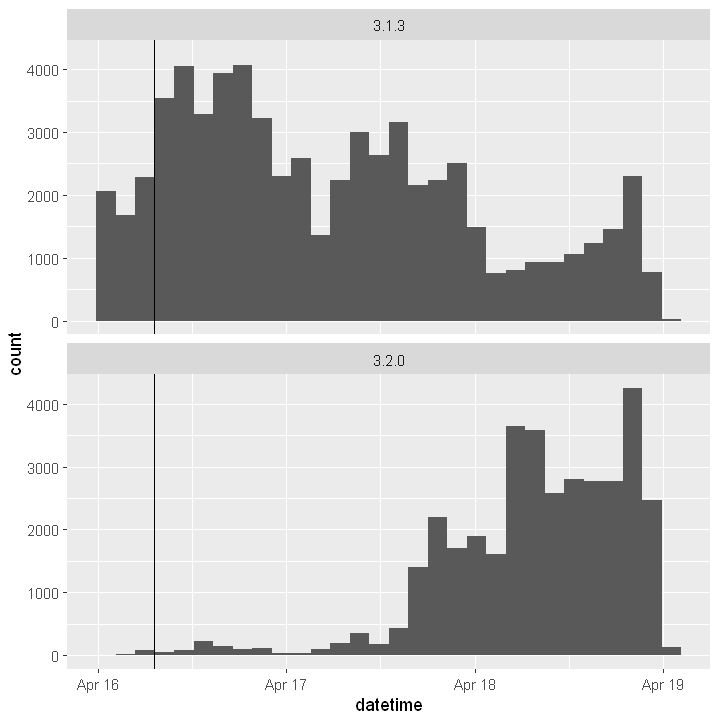

In [84]:
# Store the release time as a POSIXct object
release_time <- as.POSIXct("2015-04-16 07:13:33", tz = "UTC")

# Examine histograms of downloads by version
ggplot(logs, aes(x = datetime)) +
  geom_histogram() +
  geom_vline(aes(xintercept = as.numeric(release_time)))+
  facet_wrap(~ r_version, ncol = 1)

<a name="toc_004271_1.5"></a>
**1.5 Working with times without dates**

The `hms` package provides a *hms class of object* for holding times without dates.

- `hms()` - creates a hms object
- `as.hms()` - converts a time to a hms class of object

In [192]:
hms(56, 34, 12)
hms(hours = 1)

12:34:56

01:00:00

In [187]:
Sys.time()
as.hms(Sys.time())

[1] "2023-08-21 16:24:28 CEST"

16:24:28.474549

In [188]:
as.hms("12:05:41") - as.hms("12:05:31")

Time difference of 10 secs

<a name="toc_004271_2"></a>
## 2.   Using lubridate

The **lubridate package** (which is part of the tidyverse) is designed to make working with dates and times as easy as possible in R. One nice aspect is that we only need to learn one function for any kind of datetime object as it can work with many different date formats, like
- Date objects
- POSIXct objects
- time series objects like **zoo** or **xts** 

Note that if you don't specify a timezone, lubridate will assume UTC.

<a name="toc_004271_2.1"></a>
**2.1 Convert (parse) dates to date objects with lubridate**

- `ymd()`, `ydm()`, `mdy()`, `myd()`, `dmy()`, `dym()` functions - they can recognise a wide range of date inputs and convert them to standard date objects.
- `parse_date_time(x = , order =)` - a handy feature if the dates we need to parse are in more than one format, just use e.g. `order = c("ydm","dmy")`. 
- `make_date(year =, month =, day =)` - allow you to make dates from individual columns of a dataset.
- `make_datetime()` - similar as the above but adds `hour =, min =, sec =` arguments to build a datetime from it's components.

Additional possible formating characters used with `order =`:

<div style="text-align:center;">
  <img src="images/dates_001.png" width = "500" align="center">
</div>

In [96]:
ymd("2013.02.27")

[1] "2013-02-27"

In [89]:
dmy("27/02/13")

[1] "2013-02-27"

In [91]:
mdy("Feb 27 13")

[1] "2013-02-27"

In [100]:
mdy_hm("Sep, 12th 2010 14:00")

[1] "2010-09-12 14:00:00 UTC"

In [97]:
parse_date_time(x = c("2013.02.27", "Feb 27 13"),
                order =c("ymd", "mdy"))

[1] "2013-02-27 UTC" "2013-02-27 UTC"

In [102]:
x <- "Monday June 1st 2010 at 4pm"
parse_date_time(x, orders = "ABdyIp")

[1] "2010-06-01 16:00:00 UTC"

In [107]:
short_dates <- c("11 December 1282", "May 1372", "1253", "May 5")
parse_date_time(short_dates, orders = c("dmY", "mY", "Y", "md"))

[1] "1282-12-11 UTC" "1372-05-01 UTC" "1253-01-01 UTC" "2023-05-05 UTC"

☝️ Notice how R will substitute default values when date information is missing.

In [194]:
make_datetime(year = 1999, month = 12, day = 22, sec = 10)

[1] "1999-12-22 00:00:10 UTC"

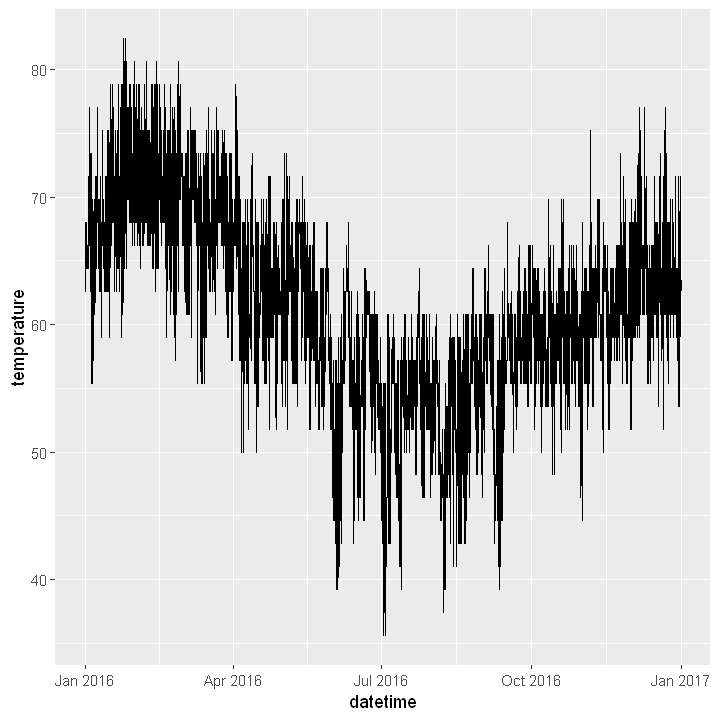

In [136]:
# Use make_date() to combine year, month and mday 
akl_hourly  <- weather16  %>% 
  mutate(date = make_date(year = year, month = month, day = mday))

# Parse datetime_string 
akl_hourly <- akl_hourly  %>% 
  mutate(
    datetime_string = paste(date, time, sep = "T"),
    datetime = ymd_hms(datetime_string)
  )

# Plot to check work
ggplot(akl_hourly, aes(x = datetime, y = temperature)) +
  geom_line()


The `fasttime` package provides faster alternatives to `parse_date_time`. 
- `fastPOSIXct()` - reads in dates formatted in the standard order: year, month, day, hour, minute, second. Because it's pickier about the input format than `parse_date_time`, it can be extremely fast.
- `fast_strptime(x, format = )` - it takes format argument instead of order arguments.

To compare the speed of functions:

```r
library(microbenchmark)

microbenchmark(
  ymd_hms = ymd_hms(dates),
  fasttime = fastPOSIXct(dates),
  times = 20)

```

In [229]:
fastPOSIXct("2003.02.27")
fastPOSIXct("2013/12/05")

[1] "2003-02-27 01:00:00 CET"

[1] "2013-12-05 01:00:00 CET"

In [228]:
fast_strptime("2003.02.27", format = "%Y.%m.%d")
fast_strptime("09-27-02", format = "%y-%d-%m")
fast_strptime("2015-12-31T11:00:00Z", format = "%Y-%m-%dT%H:%M:%SZ")

[1] "2003-02-27 UTC"

[1] "2009-02-27 UTC"

[1] "2015-12-31 11:00:00 UTC"

<a name="toc_004271_2.2"></a>
**2.2 Extract information from datetimes**

- The `year()`, `month()`, `day()` etc. functions will extract the given values from datetimes.

In [41]:
a <- "1997-12-04 08:47:58 UTC"
year(a)
month(a)
print(month(a, label = TRUE))
day(a)
hour(a)
minute(a)
second(a)
tz(a) # Timezone

[1] 1997

[1] 12

[1] Dec
12 Levels: Jan < Feb < Mar < Apr < May < Jun < Jul < Aug < Sep < ... < Dec


[1] 4

[1] 8

[1] 47

[1] 58

[1] "UTC"

In [85]:
wday(a) # weekday
print(wday(a, label = TRUE))
wday(a) %in% 2:6 # is it weekday? (not weekends)

[1] 5

[1] Thu
Levels: Sun < Mon < Tue < Wed < Thu < Fri < Sat


[1] TRUE

In [87]:
yday(a) # day of the year
quarter(a) # quarter of year
am(a) # in morning T|F
leap_year(a) # T|F

[1] 338

[1] 4

[1] TRUE

[1] FALSE

We can also manipulate dates this way

In [19]:
year(a) <- 2023
a

[1] "2023-02-27"

Now some more complicated exapmles:

In [38]:
release$wday <- wday(release$datetime, label = TRUE) 
head(release)

major,minor,patch,date,datetime,time,type,wday
<dbl>,<dbl>,<dbl>,<date>,<dttm>,<time>,<chr>,<ord>
0,60,NA,1997-12-04,1997-12-04 08:47:58,08:47:58,patch,Thu
0,61,NA,1997-12-21,1997-12-21 13:09:22,13:09:22,minor,Sun
0,61,1,1998-01-10,1998-01-10 00:31:55,00:31:55,patch,Sat
0,61,2,1998-03-14,1998-03-14 19:25:55,19:25:55,patch,Sat
0,61,3,1998-05-02,1998-05-02 07:58:17,07:58:17,patch,Sat
0,62,NA,1998-06-14,1998-06-14 12:56:20,12:56:20,minor,Sun


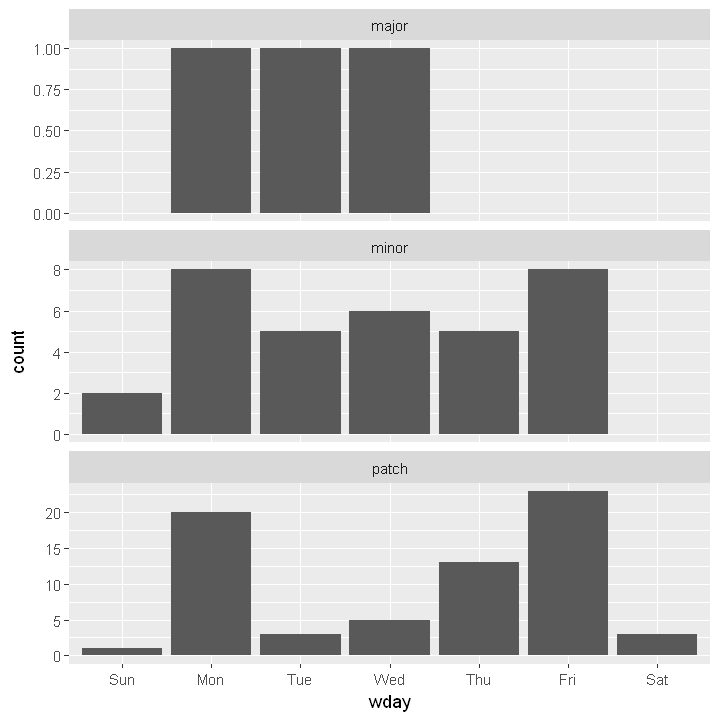

In [39]:
ggplot(release, aes(wday)) +
  geom_bar() +
  facet_wrap(~ type, ncol = 1, scale = "free_y")

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(density)` instead."
Warning message:
"Removed 10 rows containing non-finite values (`stat_density()`)."


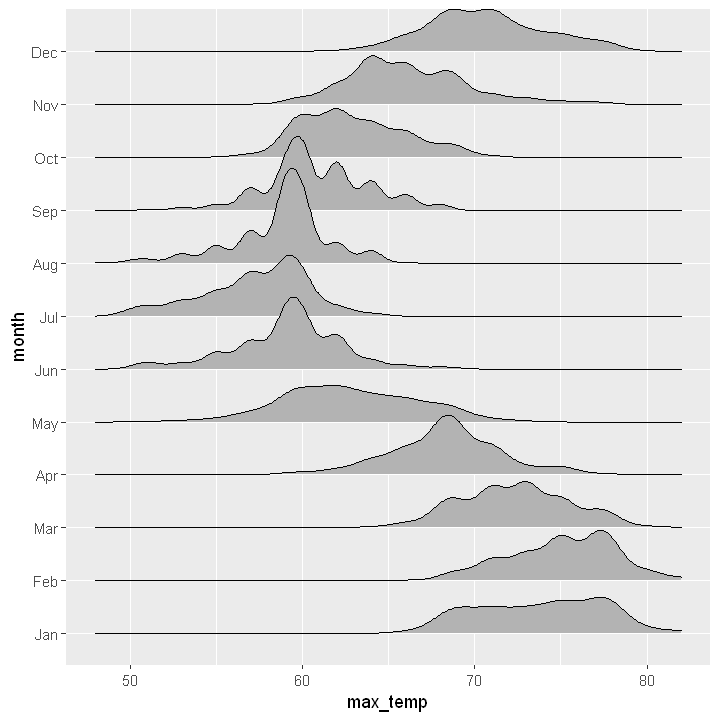

In [46]:
akl_daily <- weather %>%
  mutate(
    year = year(date),
    yday = yday(date),
    month = month(date, label = TRUE))

ggplot(akl_daily, aes(x = max_temp, y = month, height = ..density..)) +
  geom_density_ridges(stat = "density")

In [88]:
# Create new columns hour, month and rainy
akl_hourly <- weather16 %>%
  mutate(
    hour = hour(date_utc),
    month = month(date_utc, label = TRUE),
    rainy = weather == "Precipitation",
    date = date(date_utc)  
  )

head(akl_hourly, 2)

year,month,mday,time,temperature,weather,conditions,events,humidity,date_utc,datetime,hour,rainy,date
<dbl>,<ord>,<dbl>,<time>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dttm>,<dttm>,<int>,<lgl>,<date>
2016,Dec,1,00:00:00,68,Clear,Clear,NA,68,2015-12-31 11:00:00,2015-12-31 11:00:00,11,FALSE,2015-12-31
2016,Dec,1,00:30:00,68,Clear,Clear,NA,68,2015-12-31 11:30:00,2015-12-31 11:30:00,11,FALSE,2015-12-31


In [79]:
# Filter for hours between 8am and 10pm (inclusive)
akl_day <- akl_hourly %>% 
  filter(hour >= 8, hour <= 22)

# Summarise for each month, the number of days with rain
akl_day %>% 
  group_by(month) %>%
  summarise(
    days_rainy = sum(rainy)
  )

month,days_rainy
<ord>,<int>
Jan,93
Feb,84
Mar,69
Apr,63
May,145
Jun,156
Jul,169
Aug,123
Sep,174


<a name="toc_004271_2.3"></a>
**2.3 Rounding datetimes**

Lubridate has the following rounding functions for date objects:

- `round_date()` - rounds to nearest 
- `ceiling_date()` - rounds up
- `floor_date()` - rounds down

Each of them has a `unit = ` argument that specifies the unit we want to round, e.g. `minute`, `hour`, `day`, `year` etc. and we can also add multiples e.g. `2 years`, `5 minutes`

In [93]:
r_3_4_1 <- ymd_hms("2016-05-03 07:13:28 UTC") # wednesday

# Round down to day
floor_date(r_3_4_1, unit = "day")

# Round to nearest 5 minutes
round_date(r_3_4_1, unit = "5 minutes")

# Round up to week
ceiling_date(r_3_4_1, unit = "week")

# Subtract r_3_4_1 rounded down to day
r_3_4_1 - floor_date(r_3_4_1, unit = "day")

[1] "2016-05-03 UTC"

[1] "2016-05-03 07:15:00 UTC"

[1] "2016-05-08 UTC"

Time difference of 7.224444 hours

<a name="toc_004271_3"></a>
## 3.   Arithmetic with Dates and Times

<a name="toc_004271_3.1"></a>
**3.1 Subtracting dates**

Subtraction for time elapsed:
    - `datetime_1 - datetime_2` 
    - `difftime()` - same result but can specify the `unit = ` as well. E.g. "hours", "minutes", "secs", "weeks".  etc.

In [101]:
start23 <- ymd("2023-01-01")
bday23 <- ymd("2023-06-08")
bday23 - start23

Time difference of 158 days

In [105]:
difftime(bday23, start23, units = "weeks")

Time difference of 22.57143 weeks

<a name="toc_004271_3.2"></a>
**3.2 Working with periods and durations**

<u>Periods</u>

If we want to calculate with a given period of time instead of dates, we can use the following functions. The result will be presented in human units.
- `seconds()`, `days()`, `minutes()`, `hours()`, `years()` etc


<u>Durations</u>

Alternatively, if we want to calculate with the duration of the given time period **in seconds**, we can write an extra `d` at the beginning of the above functions. The result will be presented in seconds.
- `dseconds()`, `ddays()`, `dminutes()`, `dhours()`, `dyears()` etc

In [134]:
days(5) # stores the period of 5 days (in days)
5 * days() # same result
days(29) + hours(12) + minutes(44) + seconds(3)
1:3 * days(2) # sequence of day periods

[1] "5d 0H 0M 0S"

[1] "5d 0H 0M 0S"

[1] "29d 12H 44M 3S"

[1] "2d 0H 0M 0S" "4d 0H 0M 0S" "6d 0H 0M 0S"

In [129]:
ddays(5) # stores the duration of 5 days in seconds
ddays(29) + dhours(12) + dminutes(44) + dseconds(3)

[1] "432000s (~5 days)"

[1] "2551443s (~4.22 weeks)"

In [111]:
# Add a period of one week to mon_2pm
mon_2pm <- dmy_hm("27 Aug 2018 14:00")
mon_2pm + weeks(1)

# Add a duration of 81 hours to tue_9am
tue_9am <- dmy_hm("28 Aug 2018 9:00")
tue_9am + hours(81)

# Subtract a period of five years from today()
today() - years(5)

# Subtract a duration of five years from today()
today() - dyears(5)

[1] "2018-09-03 14:00:00 UTC"

[1] "2018-08-31 18:00:00 UTC"

[1] "2018-08-21"

[1] "2018-08-20 18:00:00 UTC"

In [136]:
## Generating sequences of datetimes

# Add a period of 8 hours to today
today_8am <- today() + hours(8) 

# Sequence of two weeks from 1 to 10
every_two_weeks <- 1:10 * weeks(2)

# Create datetime for every two weeks for a year
today_8am + every_two_weeks

 [1] "2023-09-04 08:00:00 UTC" "2023-09-18 08:00:00 UTC"
 [3] "2023-10-02 08:00:00 UTC" "2023-10-16 08:00:00 UTC"
 [5] "2023-10-30 08:00:00 UTC" "2023-11-13 08:00:00 UTC"
 [7] "2023-11-27 08:00:00 UTC" "2023-12-11 08:00:00 UTC"
 [9] "2023-12-25 08:00:00 UTC" "2024-01-08 08:00:00 UTC"

What should `ymd("2018-01-31") + months(1)` return? Should it be 30, 31 or 28 days in the future? In general lubridate returns the **same day of the month** in the next month, but since the 31st of February doesn't exist lubridate returns a missing value, `NA`.

There are alternative addition and subtraction operators that rather than returning an `NA` for a non-existent date, they roll back to the last existing date.
- `%m+%` 
- `%m-%` 

In [138]:
jan_31 <- ymd("2023-01-31")

# A sequence of 1 to 12 periods of 1 month
month_seq <- 1:12 * months(1)

# Add 1 to 12 months to jan_31
jan_31 + month_seq 

# Replace + with %m+%
jan_31 %m+% month_seq

# Replace + with %m-%
jan_31 %m-% month_seq

[1] NA           "2023-03-31" NA           "2023-05-31" NA          
 [6] "2023-07-31" "2023-08-31" NA           "2023-10-31" NA          
[11] "2023-12-31" "2024-01-31"

[1] "2023-02-28" "2023-03-31" "2023-04-30" "2023-05-31" "2023-06-30"
 [6] "2023-07-31" "2023-08-31" "2023-09-30" "2023-10-31" "2023-11-30"
[11] "2023-12-31" "2024-01-31"

[1] "2022-12-31" "2022-11-30" "2022-10-31" "2022-09-30" "2022-08-31"
 [6] "2022-07-31" "2022-06-30" "2022-05-31" "2022-04-30" "2022-03-31"
[11] "2022-02-28" "2022-01-31"

<a name="toc_004271_3.2"></a>
**3.2 Working with intervals**

Creating interval objects
- `datetime_1 %--% datetime_2` 
- `interval(datetime_1,datetime_2)`
    
Extracting start and end of an interval:
- `int_start()`
- `int_end()`

Working with intervals:
- `date %within%` inteval - check if a given datetime is within an interval
- `int_overlaps(interval_1, interval_2)` - checks if two intervals overlap

Interval to timespan>
- `as.duration()`
- `as.period()`

In [154]:
dmy("5 January 1961") %--% dmy("30 January 1969") # interval object
interval(dmy("5 January 1961"), dmy("30 January 1969")) # same result

[1] 1961-01-05 UTC--1969-01-30 UTC

[1] 1961-01-05 UTC--1969-01-30 UTC

In [145]:
int1 <- dmy("5 January 1961") %--% dmy("30 January 1969")

int_start(int1)
int_end(int1)

[1] "1961-01-05 UTC"

[1] "1969-01-30 UTC"

In [150]:
incident1 <- ymd("1960 Dec 12")
incident2 <- ymd("1963 Dec 12")

incident1 %within% int1
incident2 %within% int1

[1] FALSE

[1] TRUE

In [155]:
hendrix <- dmy("01 Oct 1966") %--% dmy("16 Sep 1970")
beatles <- dmy("05 Jan 1961") %--% dmy("30 Jan 1969")

int_overlaps(beatles, hendrix)

[1] TRUE

In [157]:
as.period(beatles)
as.duration(beatles)

[1] "8y 0m 25d 0H 0M 0S"

[1] "254620800s (~8.07 years)"

<a name="toc_004271_4"></a>
## 4.   Time zones

Time zones are a way to keep track of the differences between local times in different locations. In R, to specify the timezone for a datetime you use a character string containing a region and city name instead GMT+3. This is because offsets might change through the year due to daylight savings, and when, and if, daylight savings occurred might have changed through history. 

Functions for managing timezones:
- `OlsonNames()` - lists all timezone names R knows.
- `Sys.timezone()` - shows the local timezone
- `force_tz()` - overwrites a datetime's timezone
- `with_tz()` - view the same instant in a different timezone

In [162]:
Sys.timezone() # local time zone

[1] "Europe/Prague"

In [170]:
tz1 <- dmy_hm("27 Aug 2018 14:00")
tz1

force_tz(tz1, tzone = "Europe/Prague")
with_tz(tz1, tzone = "Europe/Prague")

[1] "2018-08-27 14:00:00 UTC"

[1] "2018-08-27 14:00:00 CEST"

[1] "2018-08-27 16:00:00 CEST"

<a name="toc_004271_5"></a>
## 5.   Formatting datetimes

When you want to output a date in a nice way for human consumption, perhaps as a timestamp on a report use: 
- `stamp()` - takes a string which should be an example of how the date should be formatted, and returns a function that can be used to format dates.

In [234]:
# Create a stamp based on "Saturday, Jan 1, 2000"
date_stamp <- stamp("Saturday, Jan 1, 2000")

# Print the generated date_stamp function
date_stamp

Multiple formats matched: "%A, %b %d, %Y"(1), "Saturday, %Om %d, %Y"(1), "Saturday, Jan %Om, %Y"(1), "Saturday, %b %d, %Y"(1), "Saturday, Jan %m, %Y"(1), "%A, %Om %d, %Y"(0), "%A, Jan %Om, %Y"(0), "%A, Jan %m, %Y"(0)

Using: "%A, %b %d, %Y"



function (x, locale = "English_United States.1252") 
{
    {
        old_lc_time <- Sys.getlocale("LC_TIME")
        if (old_lc_time != locale) {
            on.exit(Sys.setlocale("LC_TIME", old_lc_time))
            Sys.setlocale("LC_TIME", locale)
        }
    }
    format(x, format = "%A, %b %d, %Y")
}
<environment: 0x0000000028bdc518>

In [242]:
# Call the date_stamp function on date objects
date_stamp(today())

xy <- as.Date("2012-01-05")
xy
date_stamp(xy)

[1] "Tuesday, Aug 22, 2023"

[1] "2012-01-05"

[1] "Thursday, Jan 05, 2012"

In [245]:
my_stamp <- stamp("Created on Sunday, Jan 1, 1999 3:34 pm")

D <- ymd("2010-04-05") 
my_stamp(D)

Multiple formats matched: "Created on %A, %b %d, %Y %I:%M %p"(1), "Created on Sunday, %b %d, %Y %I:%M %p"(1), "Created on %A, %Om %d, %Y %I:%M %p"(0), "Created on Sunday, %Om %d, %Y %I:%M %p"(0)

Using: "Created on %A, %b %d, %Y %I:%M %p"



[1] "Created on Monday, Apr 05, 2010 12:00 AM"